In [5]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Set a random seed.
np.random.seed(42)

%matplotlib inline

In [6]:
final_df=pd.read_csv('./final_df.csv')

In [7]:
final_df.isnull().sum()

accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
guests_included             0
                           ..
summary_contains_young      0
summary_contains_youtube    0
summary_contains_zen        0
summary_contains_zero       0
summary_contains_zoo        0
Length: 4343, dtype: int64

In [8]:
print(len(final_df.columns)) #we go 5319 columns  
print((len(final_df.columns)**0.5)) #we should have 75 features 

4343
65.90144156238162


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(final_df)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

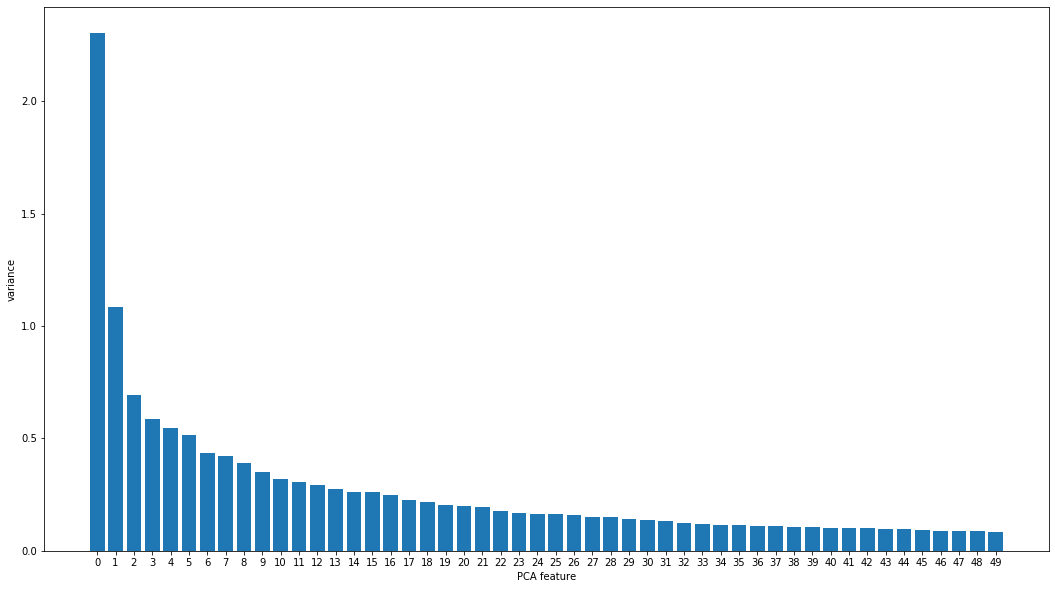

In [10]:
features = range(pca.n_components_)
plt.figure(figsize=(18,10))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [11]:
Z= pca.transform(final_df)

In [12]:
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,...,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04,3.454700e+04
mean,-2.797169e-16,2.731653e-15,1.625726e-16,-7.251687e-16,-6.200355e-17,3.701172e-16,-1.262229e-16,7.599502e-17,3.145743e-16,-5.004861e-17,...,-1.005719e-16,-9.489937e-18,-8.384438e-17,1.646519e-17,-8.092638e-17,8.207687e-17,-6.466205e-17,-1.073519e-16,-4.912641e-17,1.534964e-17
std,1.517422e+00,1.040739e+00,8.321077e-01,7.655478e-01,7.394051e-01,7.163210e-01,6.612052e-01,6.480189e-01,6.237501e-01,5.937409e-01,...,3.208580e-01,3.167235e-01,3.156405e-01,3.135449e-01,3.093868e-01,3.077482e-01,2.979637e-01,2.965646e-01,2.934655e-01,2.908621e-01
min,-2.653094e+00,-2.669685e+00,-2.389014e+00,-2.006934e+00,-2.523048e+00,-1.740621e+00,-2.341389e+00,-2.010259e+00,-1.943284e+00,-2.139131e+00,...,-1.121374e+00,-1.273682e+00,-1.178581e+00,-1.324593e+00,-1.264577e+00,-1.243288e+00,-1.268962e+00,-1.273735e+00,-1.163922e+00,-1.534478e+00
25%,-1.354450e+00,-8.003843e-01,-5.975986e-01,-5.985903e-01,-5.234374e-01,-5.675358e-01,-4.542358e-01,-4.467190e-01,-4.737750e-01,-3.692403e-01,...,-2.246664e-01,-2.044994e-01,-2.113813e-01,-2.029170e-01,-2.045835e-01,-1.988245e-01,-1.541526e-01,-1.658998e-01,-1.641960e-01,-1.349050e-01
50%,-2.491783e-01,-3.067361e-02,-1.093956e-02,5.733230e-02,-2.308813e-02,-9.941311e-02,-1.155209e-02,1.014748e-02,-1.162757e-02,-2.446180e-02,...,-2.342018e-02,3.617697e-03,-1.224200e-02,-4.309604e-03,5.447739e-03,-1.800405e-03,-1.252105e-02,-2.832630e-02,-1.629724e-02,3.606808e-03
75%,1.376821e+00,7.688968e-01,5.850152e-01,6.222205e-01,5.009642e-01,5.505678e-01,4.465898e-01,4.555075e-01,4.801559e-01,3.106886e-01,...,1.957554e-01,2.041024e-01,1.976742e-01,1.929446e-01,2.096747e-01,1.921996e-01,1.246401e-01,1.132745e-01,1.405161e-01,1.471350e-01
max,3.656974e+00,2.842734e+00,2.772614e+00,2.112392e+00,2.691492e+00,2.280011e+00,2.461171e+00,2.285951e+00,2.102108e+00,3.918556e+00,...,1.716100e+00,1.429741e+00,1.417480e+00,1.840757e+00,1.375450e+00,1.321037e+00,2.212678e+00,1.804044e+00,1.395172e+00,1.666567e+00


In [13]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 75 components): {np.round(var_exp[:50],3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 75 components): {np.round(cum_var_exp[:50],3)}')

Explained variance (first 75 components): [0.123 0.058 0.037 0.031 0.029 0.027 0.023 0.022 0.021 0.019 0.017 0.016
 0.016 0.015 0.014 0.014 0.013 0.012 0.012 0.011 0.011 0.01  0.009 0.009
 0.009 0.009 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.006 0.006 0.006
 0.006 0.006 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005]

Cumulative explained variance (first 75 components): [0.123 0.181 0.218 0.249 0.278 0.305 0.329 0.351 0.372 0.391 0.408 0.424
 0.44  0.454 0.468 0.482 0.496 0.508 0.519 0.53  0.541 0.551 0.561 0.57
 0.578 0.587 0.596 0.604 0.612 0.619 0.627 0.634 0.64  0.647 0.653 0.659
 0.665 0.671 0.676 0.682 0.687 0.693 0.698 0.703 0.708 0.714 0.718 0.723
 0.728 0.732]


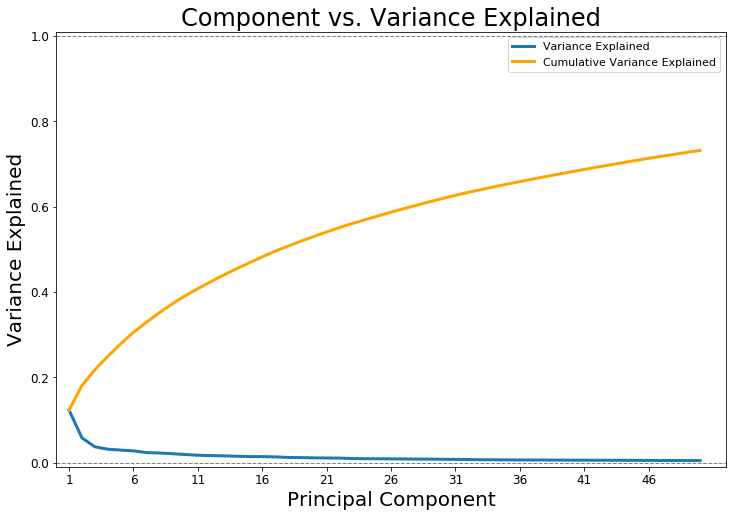

In [14]:
# Plot the variance explained (and cumulative variance explained).

# Set figure size.
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,51])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 50, 5), range(1, 50, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [15]:
pca_df = pd.DataFrame(Z)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.040408,-0.611301,0.032546,0.678397,-0.491853,-0.890303,-0.470255,-0.018804,0.072064,1.352805,...,0.029520,0.251211,0.054273,0.017186,0.182832,0.943999,1.002324,1.097540,0.914941,-0.404713
1,1.682473,-0.875044,-0.104594,0.117284,-0.142246,-0.782542,-0.889862,-0.153305,0.526997,-0.473992,...,-0.033454,0.039465,-0.289800,0.068572,0.058562,-0.056426,1.250754,0.816075,-0.301431,-0.019679
2,-2.016898,1.760025,0.531260,0.397882,-0.952575,-0.530253,-0.973099,0.987037,-0.619842,0.427319,...,-0.163360,0.353798,0.157065,-0.096169,-0.038425,-0.007208,0.026336,0.058857,0.072593,0.029497
3,-0.165656,0.077436,0.592298,-0.820660,0.278002,-0.184321,-0.835664,0.348599,-0.428157,-0.363621,...,0.148991,0.232485,-0.705775,0.035140,0.303981,-0.012175,-0.879333,0.381309,-0.399937,-0.187848
4,-1.211819,-0.761037,1.359039,1.022477,0.690092,0.107377,-0.388839,-0.106137,0.127953,-0.230334,...,0.450295,0.120002,0.103434,0.055290,0.469955,0.064334,0.917960,1.160511,0.050689,-0.416472


In [16]:
#we want to make use of just the pca columns, so create a new dataframe which has just the ids and name for identification
airbnb_clean = pd.read_csv('airbnb_clean.csv')
airbnb_clean['adjusted_price'] =airbnb_clean.price / airbnb_clean.minimum_nights
airbnb_clean.head()

,id,name,summary,description,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,adjusted_price
0,2595.0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart...",6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",Midtown,Manhattan,40.75362,...,0,0,1,0,0,0,1,0,1,22.500000
1,5099.0,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,My large 1 bedroom apartment has a true New Yo...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Murray Hill,Manhattan,40.74767,...,1,0,0,0,0,0,1,0,1,66.666667
2,5121.0,BlissArtsSpace!,,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Bedford-Stuyvesant,Brooklyn,40.68688,...,0,0,1,0,0,1,0,1,0,2.068966
3,5178.0,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",Hell's Kitchen,Manhattan,40.76489,...,0,0,1,0,0,1,0,1,0,39.500000
4,5203.0,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...","Our best guests are seeking a safe, clean, spa...",1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",Upper West Side,Manhattan,40.80178,...,0,0,0,0,0,0,1,0,1,39.500000


In [17]:
airbnb_temp = airbnb_clean.copy()

In [18]:
low_indexes = airbnb_temp[airbnb_temp.adjusted_price < 50].index
med_indexes = airbnb_temp[(airbnb_temp.adjusted_price >= 50) &
                         (airbnb_temp.adjusted_price < 200)].index
high_indexes = airbnb_temp[(airbnb_temp.adjusted_price >= 200)].index

In [19]:
airbnb_temp.loc[low_indexes, 'price_category'] = 'low'
airbnb_temp.loc[med_indexes, 'price_category'] = 'medium'
airbnb_temp.loc[high_indexes, 'price_category'] = 'high'
airbnb_temp.head()

,id,name,summary,description,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,adjusted_price,price_category
0,2595.0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart...",6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",Midtown,Manhattan,40.75362,...,0,1,0,0,0,1,0,1,22.500000,low
1,5099.0,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,My large 1 bedroom apartment has a true New Yo...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Murray Hill,Manhattan,40.74767,...,0,0,0,0,0,1,0,1,66.666667,medium
2,5121.0,BlissArtsSpace!,,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Bedford-Stuyvesant,Brooklyn,40.68688,...,0,1,0,0,1,0,1,0,2.068966,low
3,5178.0,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",Hell's Kitchen,Manhattan,40.76489,...,0,1,0,0,1,0,1,0,39.500000,low
4,5203.0,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...","Our best guests are seeking a safe, clean, spa...",1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",Upper West Side,Manhattan,40.80178,...,0,0,0,0,0,1,0,1,39.500000,low


In [20]:
airbnb_temp.price_category.value_counts()

low       18384
medium    14888
high       1275
Name: price_category, dtype: int64

In [21]:
cols = ['price_category','name', 'id', 'price', 'adjusted_price', 
        'minimum_nights', 'bedrooms', 'bathrooms',
        'neighbourhood_group_cleansed', 'neighbourhood_cleansed']

airbnb_reduced = airbnb_temp[cols]

# merge this with PCA features
airbnb_pca = pd.concat([airbnb_reduced, pca_df], axis=1)




In [22]:
airbnb_pca.head()

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,...,40,41,42,43,44,45,46,47,48,49
0,low,Skylit Midtown Castle,2595.0,225.0,22.500000,10.0,0.0,1.0,Manhattan,Midtown,...,0.029520,0.251211,0.054273,0.017186,0.182832,0.943999,1.002324,1.097540,0.914941,-0.404713
1,medium,Large Cozy 1 BR Apartment In Midtown East,5099.0,200.0,66.666667,3.0,1.0,1.0,Manhattan,Murray Hill,...,-0.033454,0.039465,-0.289800,0.068572,0.058562,-0.056426,1.250754,0.816075,-0.301431,-0.019679
2,low,BlissArtsSpace!,5121.0,60.0,2.068966,29.0,1.0,1.0,Brooklyn,Bedford-Stuyvesant,...,-0.163360,0.353798,0.157065,-0.096169,-0.038425,-0.007208,0.026336,0.058857,0.072593,0.029497
3,low,Large Furnished Room Near B'way,5178.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Hell's Kitchen,...,0.148991,0.232485,-0.705775,0.035140,0.303981,-0.012175,-0.879333,0.381309,-0.399937,-0.187848
4,low,Cozy Clean Guest Room - Family Apt,5203.0,79.0,39.500000,2.0,1.0,1.0,Manhattan,Upper West Side,...,0.450295,0.120002,0.103434,0.055290,0.469955,0.064334,0.917960,1.160511,0.050689,-0.416472


In [23]:
airbnb_pca.to_csv('./airbnb_pca.csv',index=False)